# Peliculas


In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('letterboxd-reviews.csv', sep=',', encoding='latin1')
data.head()

Saving letterboxd-reviews.csv to letterboxd-reviews.csv


,Movie name,Release Year,Rating,Reviewer name,Review date,Review,Comment count,Like count
0,Aftersun (2022),2022,â??â??â??â??Â½,Tuomas,12-Jan-20,This review may contain spoilers.,130,"22,44 6 likes"
1,Joker (2019),2019,â??â??â??â??â??,Joao,20-Dec-22,if youâ??ve never swam in the ocean then of co...,1.8K,"22,032 likes"
2,Puss in Boots: The Last Wish (2022),2022,â??Â½,NicoPico,15-Sep-22,Puss in Boots: Into the Pussy-Verse,6 2,"21, 6 6 6 likes"
3,The Banshees of Inisherin (2022),2022,â??â??â??â??â??,Ella Kemp,8-Apr-22,I will NOT leave my donkey outside when Iâ??m sad,NaN,"21, 6 09 likes"
4,Everything Everywhere All at Once (2022),2022,â??â??Â½,CosmonautMarkie,14-Aug-19,Watch it and have fun before film Twitter tell...,355,"20, 6 88 likes"


In [2]:

data.drop('Rating', axis=1, inplace=True)


In [3]:
nulos = data['Review'].isnull().sum()
nulos

1036

In [4]:

data = data.dropna(subset=['Review'])
nulos = data['Review'].isnull().sum()
nulos


0

In [5]:
import re

def clean(text):

    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

data['clean reviews'] = data['Review'].astype(str)
data.head()

,Movie name,Release Year,Reviewer name,Review date,Review,Comment count,Like count,clean reviews
0,Aftersun (2022),2022,Tuomas,12-Jan-20,This review may contain spoilers.,130,"22,44 6 likes",This review may contain spoilers.
1,Joker (2019),2019,Joao,20-Dec-22,if youâ??ve never swam in the ocean then of co...,1.8K,"22,032 likes",if youâ??ve never swam in the ocean then of co...
2,Puss in Boots: The Last Wish (2022),2022,NicoPico,15-Sep-22,Puss in Boots: Into the Pussy-Verse,6 2,"21, 6 6 6 likes",Puss in Boots: Into the Pussy-Verse
3,The Banshees of Inisherin (2022),2022,Ella Kemp,8-Apr-22,I will NOT leave my donkey outside when Iâ??m sad,NaN,"21, 6 09 likes",I will NOT leave my donkey outside when Iâ??m sad
4,Everything Everywhere All at Once (2022),2022,CosmonautMarkie,14-Aug-19,Watch it and have fun before film Twitter tell...,355,"20, 6 88 likes",Watch it and have fun before film Twitter tell...


In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')


pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS tagged'] = data['clean reviews'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Movie name,Release Year,Reviewer name,Review date,Review,Comment count,Like count,clean reviews,POS tagged
0,Aftersun (2022),2022,Tuomas,12-Jan-20,This review may contain spoilers.,130,"22,44 6 likes",This review may contain spoilers.,"[(review, n), (may, None), (contain, v), (spoi..."
1,Joker (2019),2019,Joao,20-Dec-22,if youâ??ve never swam in the ocean then of co...,1.8K,"22,032 likes",if youâ??ve never swam in the ocean then of co...,"[(youâ, v), (?, None), (?, None), (never, r), ..."
2,Puss in Boots: The Last Wish (2022),2022,NicoPico,15-Sep-22,Puss in Boots: Into the Pussy-Verse,6 2,"21, 6 6 6 likes",Puss in Boots: Into the Pussy-Verse,"[(Puss, n), (Boots, n), (:, None), (Pussy-Vers..."
3,The Banshees of Inisherin (2022),2022,Ella Kemp,8-Apr-22,I will NOT leave my donkey outside when Iâ??m sad,NaN,"21, 6 09 likes",I will NOT leave my donkey outside when Iâ??m sad,"[(leave, v), (donkey, n), (outside, None), (Iâ..."
4,Everything Everywhere All at Once (2022),2022,CosmonautMarkie,14-Aug-19,Watch it and have fun before film Twitter tell...,355,"20, 6 88 likes",Watch it and have fun before film Twitter tell...,"[(Watch, v), (fun, v), (film, n), (Twitter, n)..."


In [13]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,Movie name,Release Year,Reviewer name,Review date,Review,Comment count,Like count,clean reviews,POS tagged,Lemma
0,Aftersun (2022),2022,Tuomas,12-Jan-20,This review may contain spoilers.,130,"22,44 6 likes",This review may contain spoilers.,"[(review, n), (may, None), (contain, v), (spoi...",review may contain spoiler .
1,Joker (2019),2019,Joao,20-Dec-22,if youâ??ve never swam in the ocean then of co...,1.8K,"22,032 likes",if youâ??ve never swam in the ocean then of co...,"[(youâ, v), (?, None), (?, None), (never, r), ...",youâ ? ? never swim ocean course pool seem d...
2,Puss in Boots: The Last Wish (2022),2022,NicoPico,15-Sep-22,Puss in Boots: Into the Pussy-Verse,6 2,"21, 6 6 6 likes",Puss in Boots: Into the Pussy-Verse,"[(Puss, n), (Boots, n), (:, None), (Pussy-Vers...",Puss Boots : Pussy-Verse
3,The Banshees of Inisherin (2022),2022,Ella Kemp,8-Apr-22,I will NOT leave my donkey outside when Iâ??m sad,NaN,"21, 6 09 likes",I will NOT leave my donkey outside when Iâ??m sad,"[(leave, v), (donkey, n), (outside, None), (Iâ...",leave donkey outside Iâ ? ? sad
4,Everything Everywhere All at Once (2022),2022,CosmonautMarkie,14-Aug-19,Watch it and have fun before film Twitter tell...,355,"20, 6 88 likes",Watch it and have fun before film Twitter tell...,"[(Watch, v), (fun, v), (film, n), (Twitter, n)...",Watch fun film Twitter tell itâ ? ? overrate


In [14]:
# function to calculate subjectivity
def getSubjectivity(reviews):
    return TextBlob(reviews).sentiment.subjectivity

# function to calculate polarity
def getPolarity(reviews):
    return TextBlob(reviews).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [53]:
# prompt: fin_data = pd.DataFrame(mydata[['review', 'Lemma']]) pero con el codigo de arriba

import pandas as pd
from textblob import TextBlob
fin_data = pd.DataFrame(data[['Review', 'Lemma']])
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data['User name'] = data['Reviewer name']
fin_data['Movie'] = data['Movie name']
fin_data['Release Year'] = data['Release Year']
fin_data.head()


,Review,Lemma,Polarity,Subjectivity,Analysis,User name,Movie,Release Year
0,This review may contain spoilers.,review may contain spoiler .,0.00,0.000,Neutral,Tuomas,Aftersun (2022),2022
1,if youâ??ve never swam in the ocean then of co...,youâ ? ? never swim ocean course pool seem d...,0.00,0.400,Neutral,Joao,Joker (2019),2019
2,Puss in Boots: Into the Pussy-Verse,Puss Boots : Pussy-Verse,0.00,0.000,Neutral,NicoPico,Puss in Boots: The Last Wish (2022),2022
3,I will NOT leave my donkey outside when Iâ??m sad,leave donkey outside Iâ ? ? sad,-0.25,0.525,Negative,Ella Kemp,The Banshees of Inisherin (2022),2022
4,Watch it and have fun before film Twitter tell...,Watch fun film Twitter tell itâ ? ? overrate,0.30,0.200,Positive,CosmonautMarkie,Everything Everywhere All at Once (2022),2022


In [54]:
def convert_to_rating(polarity):
    if polarity > 0.5:
        return 5  # Muy positivo
    elif polarity > 0:
        return 4  # Positivo
    elif polarity == 0:
        return 3  # Neutral
    elif polarity > -0.5:
        return 2  # Negativo
    else:
        return 1  # Muy negativo

# Añadir columna 'rating' basada en la polaridad
fin_data['rating'] = fin_data['Polarity'].apply(convert_to_rating)
fin_data.head()

,Review,Lemma,Polarity,Subjectivity,Analysis,User name,Movie,Release Year,rating
0,This review may contain spoilers.,review may contain spoiler .,0.00,0.000,Neutral,Tuomas,Aftersun (2022),2022,3
1,if youâ??ve never swam in the ocean then of co...,youâ ? ? never swim ocean course pool seem d...,0.00,0.400,Neutral,Joao,Joker (2019),2019,3
2,Puss in Boots: Into the Pussy-Verse,Puss Boots : Pussy-Verse,0.00,0.000,Neutral,NicoPico,Puss in Boots: The Last Wish (2022),2022,3
3,I will NOT leave my donkey outside when Iâ??m sad,leave donkey outside Iâ ? ? sad,-0.25,0.525,Negative,Ella Kemp,The Banshees of Inisherin (2022),2022,2
4,Watch it and have fun before film Twitter tell...,Watch fun film Twitter tell itâ ? ? overrate,0.30,0.200,Positive,CosmonautMarkie,Everything Everywhere All at Once (2022),2022,4


In [55]:
tb_counts =  fin_data['Analysis'].value_counts()
tb_counts

Analysis
Positive    1512
Neutral     1281
Negative     767
Name: count, dtype: int64

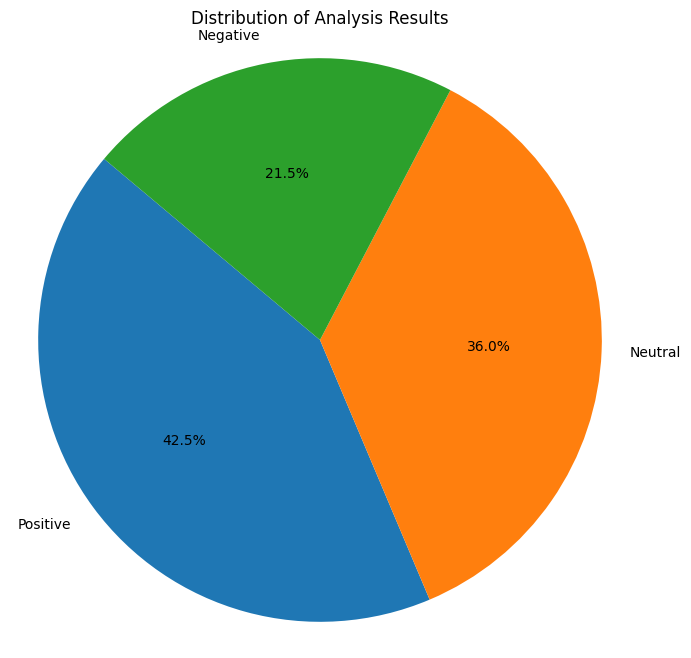

In [26]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(tb_counts, labels=tb_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Analysis Results')
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()

In [56]:
# Ejemplo simplificado de cálculo de similitud de coseno entre usuarios
from sklearn.metrics.pairwise import cosine_similarity

# Crear una matriz de usuario-película
user_movie_matrix =fin_data.pivot_table(index='User name', columns='Movie', values='rating').fillna(0)

# Calcular la similitud de coseno entre los usuarios
user_similarity = cosine_similarity(user_movie_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

print("Matriz de Similitud entre Usuarios:")
print(user_similarity_df)


Matriz de Similitud entre Usuarios:
User name                          #1 gizmo fan  24framesofnick  AJ Ford  \
User name                                                                  
#1 gizmo fan                           1.000000        0.015448      0.0   
24framesofnick                         0.015448        1.000000      0.0   
AJ Ford                                0.000000        0.000000      1.0   
ASYA                                   0.000000        0.000000      0.0   
Aaron Michael                          0.000000        0.000000      0.0   
...                                         ...             ...      ...   
ð??ð?¢ð??ð?ð??ð??ð?            0.000000        0.000000      0.0   
ð?ð??ð??                           0.000000        0.000000      0.0   
ð?ð??ð??ð??                       0.000000        0.000000      0.0   
ð?ð??ð?¢ð??ð??ð??               0.000000        0.000000      0.0   
ð?ð?ð?ð­ð¡ð?ð« ð??·      0.000000     

In [57]:
fin_data.head()

,Review,Lemma,Polarity,Subjectivity,Analysis,User name,Movie,Release Year,rating
0,This review may contain spoilers.,review may contain spoiler .,0.00,0.000,Neutral,Tuomas,Aftersun (2022),2022,3
1,if youâ??ve never swam in the ocean then of co...,youâ ? ? never swim ocean course pool seem d...,0.00,0.400,Neutral,Joao,Joker (2019),2019,3
2,Puss in Boots: Into the Pussy-Verse,Puss Boots : Pussy-Verse,0.00,0.000,Neutral,NicoPico,Puss in Boots: The Last Wish (2022),2022,3
3,I will NOT leave my donkey outside when Iâ??m sad,leave donkey outside Iâ ? ? sad,-0.25,0.525,Negative,Ella Kemp,The Banshees of Inisherin (2022),2022,2
4,Watch it and have fun before film Twitter tell...,Watch fun film Twitter tell itâ ? ? overrate,0.30,0.200,Positive,CosmonautMarkie,Everything Everywhere All at Once (2022),2022,4


In [80]:
def recommend_movies_for_user(user_name, user_movie_matrix, content_similarity_matrix, movies_df, top_n=5):
    # Obtener las calificaciones del usuario
    user_ratings = user_movie_matrix.loc[user_name]
    watched_movies = user_ratings[user_ratings > 0].index

    # Calcular la similitud entre el usuario y otros usuarios
    user_similarity_scores = content_similarity_matrix.loc[user_name]

    # Ordenar los usuarios por similitud
    similar_users = user_similarity_scores.sort_values(ascending=False).index

    # Encontrar películas recomendadas por usuarios similares que el usuario aún no ha visto
    recommendations = []
    for similar_user in similar_users:
        if similar_user == user_name:
            continue
        similar_user_ratings = user_movie_matrix.loc[similar_user]
        for movie_id in similar_user_ratings.index:
            if movie_id not in watched_movies and similar_user_ratings[movie_id] > 0:
                movie_details = movies_df[movies_df['Movie'] == movie_id].iloc[0]
                recommendations.append({
                    'Movie': movie_details['Movie'],
                    'Release Year': movie_details['Release Year'],
                    'Rating': similar_user_ratings[movie_id],
                    'Similarity': user_similarity_scores[similar_user]
                })
                if len(recommendations) >= top_n:
                    break
        if len(recommendations) >= top_n:
            break

    return recommendations

# Crear una matriz de usuario-película
user_movie_matrix = fin_data.pivot_table(index='User name', columns='Movie', values='rating').fillna(0)

# Calcular la similitud de coseno entre los usuarios
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_movie_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# Seleccionar un usuario (por ejemplo, el usuario 'benhack')
user_name = 'benhack'

# Obtener las recomendaciones
recommended_movies = recommend_movies_for_user(user_name, user_movie_matrix, user_similarity_df, fin_data, top_n=5)

# Mostrar las recomendaciones
for movie in recommended_movies:
    print(f"Película: {movie['Movie']}")
    print(f"Año de Lanzamiento: {movie['Release Year']}")
    print(f"Calificación del Usuario Similar: {movie['Rating']}")
    print(f"Similitud con el Usuario Similar: {movie['Similarity']:.4f}")
    print("\n")


Película: Eraserhead
Año de Lanzamiento: 19 6   6  
Calificación del Usuario Similar: 2.0
Similitud con el Usuario Similar: 0.5714


Película: Eternals
Año de Lanzamiento: 2021
Calificación del Usuario Similar: 4.0
Similitud con el Usuario Similar: 0.5714


Película: Sonic the Hedgehog
Año de Lanzamiento: 2020
Calificación del Usuario Similar: 2.0
Similitud con el Usuario Similar: 0.5714


Película: Venom: Let There Be Carnage
Año de Lanzamiento: 2021
Calificación del Usuario Similar: 3.0
Similitud con el Usuario Similar: 0.5714


Película: After Yang
Año de Lanzamiento: 2021
Calificación del Usuario Similar: 5.0
Similitud con el Usuario Similar: 0.1839




##Metricas de evaluacion


### Recall , Presicion , F1


In [88]:
def calculate_recall(user_name, user_movie_matrix, content_similarity_matrix, movies_df):
    recall_scores = []

    # Obtener las calificaciones del usuario
    user_ratings = user_movie_matrix.loc[user_name]
    watched_movies = user_ratings[user_ratings > 0].index

    # Verificar que el usuario haya visto al menos una película
    if len(watched_movies) == 0:
        return 0  # Si no ha visto ninguna película, el recall es 0

    # Calcular la similitud entre el usuario y otros usuarios
    user_similarity_scores = content_similarity_matrix.loc[user_name]

    # Ordenar los usuarios por similitud
    similar_users = user_similarity_scores.sort_values(ascending=False).index

    # Calcular el recall para cada película vista por el usuario
    for movie_id in watched_movies:
        # Simular que no conocemos la calificación de esta película para el usuario
        actual_rating = user_ratings[movie_id]
        user_ratings[movie_id] = 0

        # Obtener la recomendación para esta película
        recommendations = []
        for similar_user in similar_users:
            if similar_user == user_name:
                continue
            similar_user_ratings = user_movie_matrix.loc[similar_user]
            if movie_id in similar_user_ratings.index and similar_user_ratings[movie_id] > 0:
                recommendations.append(similar_user_ratings[movie_id])

        # Calcular el recall
        if recommendations:
            recall = sum([1 for rating in recommendations if rating >= actual_rating]) / len(user_ratings[user_ratings > 0])
            recall_scores.append(recall)

        # Restaurar la calificación real de la película para el usuario
        user_ratings[movie_id] = actual_rating

    avg_recall = sum(recall_scores) / len(recall_scores) if recall_scores else 0

    return avg_recall

# Calcular la precisión y recall promedio para el sistema
precision = calculate_precision('benhack', user_movie_matrix, user_similarity_df, fin_data)
recall = calculate_recall('benhack', user_movie_matrix, user_similarity_df, fin_data)

print("Precisión promedio:", precision)
print("Recall promedio:", recall)



Precisión promedio: 0
Recall promedio: 0
